<a href="https://colab.research.google.com/github/cpuman7/tensorflow_example/blob/master/11-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


W0819 09:01:50.229657 139979963922304 deprecation.py:323] From <ipython-input-19-030012b00c7c>:65: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Learning started
Epoch:  0001 cost =  0.365652760
Epoch:  0002 cost =  0.102024115
Epoch:  0003 cost =  0.073605365
Epoch:  0004 cost =  0.060561172
Epoch:  0005 cost =  0.050102010
Epoch:  0006 cost =  0.045606690
Epoch:  0007 cost =  0.043939578
Epoch:  0008 cost =  0.038386950
Epoch:  0009 cost =  0.035203932
Epoch:  0010 cost =  0.035286386
Epoch:  0011 cost =  0.029418148
Epoch:  0012 cost =  0.030336113
Epoch:  0013 cost =  0.028220017
Epoch:  0014 cost =  0.025865923
Epoch:  0015 cost =  0.025325084
Learning Finished
Accuracy: 0.9938
Label:  [8]
Prediction:  [8]


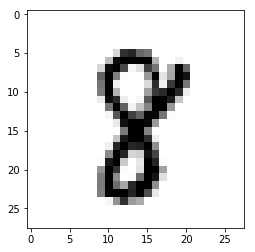

In [19]:
import tensorflow as tf
tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001  #학습률
training_epochs = 15  #epoch: 15
batch_size = 100  #배치 사이즈: 100

keep_prob = tf.placeholder(tf.float32)  #drop out  수치, 학습 시 0.5~0.7, 검증 시 1

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])  # 28*28*1사이즈로 reshape
Y = tf.placeholder(tf.float32, [None, 10])  # 출력 갯수 0~9로 10개

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  #filter size: 3(X)*3(Y)*1(C), fiter 갯수: 32, 표준편차: 0.01
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')  #stride: 1*1, strides의 [0]과 [3]은 무조건 1
#Image Shape:(?, 28, 28, 32)
L1 = tf.nn.relu(L1)  #활성화 함수: ReLU
#Image Shape:(?, 28, 28, 32)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding='SAME')  #MaxPooling, kernel size: 2*2*1, stride: 2*2*1
#Image Shape:(?, 14, 14, 32)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)  #DropOut
#Image Shape:(?, 14, 14, 32)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))  #filter size: 3*3*32(Layer1에서 32개의 filter로 생성했기 때문), filter 갯수: 64
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')  #stride: 1*1
#Image Shape:(?, 14, 14, 64)
L2 = tf.nn.relu(L2)  #활성화 함수: ReLU
#Image Shape:(?, 14, 14, 64)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  #MaxPooling, kernel size: 2*2*1, stride: 2*2*1
#Image Shape:(?, 7, 7, 64)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)  #DropOut
#Image Shape:(?, 7, 7, 64)

W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))  #filter size: 3*3*64(Layer2에서 64개의 filter로 생성했기 때문),filter 갯수: 128
L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding='SAME')  #stride: 1*1
#Image Shape:(?, 7, 7, 128)
L3 = tf.nn.relu(L3)  #활성화 함수: ReLU
#Image Shape:(?, 7, 7, 128)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  #MaxPooling, kernel size: 2*2*1, stride: 2*2*1
#Image Shape:(?, 4, 4, 128)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)  #DropOut
#Image Shape:(?, 4, 4, 128)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
#Image Shape:(?, 2048)

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625], initializer=tf.contrib.layers.xavier_initializer())  #Input size: 2048, Output size: 625, Initializer: Xavier
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)  #활성화함수: ReLU
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)  #DropOut

W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())  #Input size: 625, Output size: 10, Initializer: Xavier
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

#Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)  #Optimizer: Adam

#Initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Training
print('Learning started')
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
    c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
    avg_cost += c / total_batch
    
  print('Epoch: ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
  
print('Learning Finished')

#Check Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()